# Null Hypothesis: COVID had no effect on movie Profit/ROI (Vinny Shankar)

## Setup

In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
#Read the csv into a DataFrame
clean_df = pd.read_csv("../output_data/clean_with_currency_language.csv")

In [3]:
#Preview the DataFrame
clean_df.head()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform,CurrencyBudget,CurrencyGross,Language
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others,USD,USD,English
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others,NaN,USD,English
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others,NaN,USD,English
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others,USD,USD,English
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others,NaN,USD,English


In [4]:
#Date format
clean_df["Release"] = clean_df["Release"].astype("datetime64")

In [5]:
#Check for duplicates
print(len(clean_df))
print(clean_df["Title"].nunique())

1153
1153


In [6]:
#Empty lists
list_of_cods = []
list_of_corrs = []

#Custom scatter plot function
def sp(a,b,c,d,e,f,g):
    #Scatter plot
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60,color="blue",edgecolor="black",alpha=.5)

    #Graph properties
    plt.tick_params(axis="both",which="major",labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    plt.title(e,size=20)

    #Regression
    corr = round(a.corr(b),2)
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(f,g),color="red",size=22)
    print(f"The coefficient of determination is: {r**2}")
    print(f"The correlation is: {corr}")

    #Appending
    list_of_cods.append(r**2)
    list_of_corrs.append(corr)

    #Show plot
    plt.show()

# a = x axis
# b = y axis
# c = x label
# d = y label
# e = plot title
# f = x coord
# g = y coord
# sp(a,b,c,d,e,f,g,h)

## BoxOffice

In [7]:
#BoxOffice definition
box_office = clean_df.loc[(clean_df["CurrencyBudget"]=="USD")&(clean_df["CurrencyGross"]=="USD")]

#ROI and Profit columns
box_office["ROI"] = (box_office["Gross"]-box_office["Budget"])/box_office["Budget"]
box_office["Profit"] = box_office["Gross"]-box_office["Budget"]

C:\Users\vinay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\vinay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
#Subsets pre and post covid
box_office_pre = box_office.loc[box_office["Release"]<"2020-01-01"]
box_office_post = box_office.loc[box_office["Release"]>="2020-01-01"]

#Subsets annual
box_office_2018 = box_office.loc[clean_df["Release"]<"2019-01-01"]
box_office_2019 = box_office.loc[(clean_df["Release"]>="2019-01-01")&
                                 (clean_df["Release"]<"2020-01-01")]
box_office_2020 = box_office.loc[(clean_df["Release"]>="2020-01-01")&
                                 (clean_df["Release"]<"2021-01-01")]
box_office_2021 = box_office.loc[(clean_df["Release"]>="2021-01-01")&
                                 (clean_df["Release"]<"2022-01-01")]
box_office_2022 = box_office.loc[clean_df["Release"]>="2022-01-01"]

### Are Budget, Gross, ROI, and Profit normally distributed?

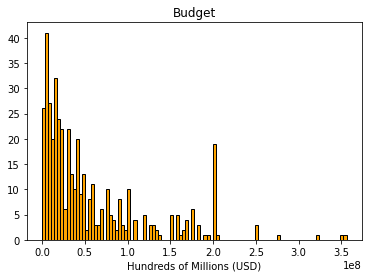

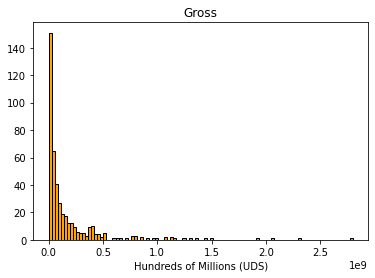

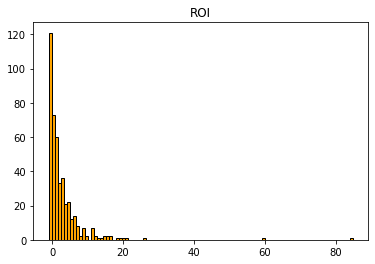

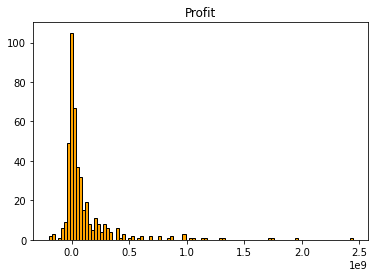

In [9]:
#budget_mean = box_office["Budget"].mean()
plt.hist(box_office["Budget"],bins=100,edgecolor="black",color="orange",align="mid")
plt.title("Budget")
plt.xlabel("Hundreds of Millions (USD)")
#plt.annotate(f"Mean budget: ${round(budget_mean/100000000,2)}e8",(1e8,30))
plt.show()
plt.hist(box_office["Gross"],bins=100,edgecolor="black",color="orange",align="mid")
plt.title("Gross")
plt.xlabel("Hundreds of Millions (UDS)")
plt.show()
plt.hist(box_office["ROI"],bins=100,edgecolor="black",color="orange",align="mid")
plt.title("ROI")
plt.show()
plt.hist(box_office["Profit"],bins=100,edgecolor="black",color="orange",align="mid")
plt.title("Profit")
plt.show()

None of the data is normally distributed.

### What is the strength of the relationship between Budget and Profit?

The coefficient of determination is: 0.3612138538410501
The correlation is: 0.6


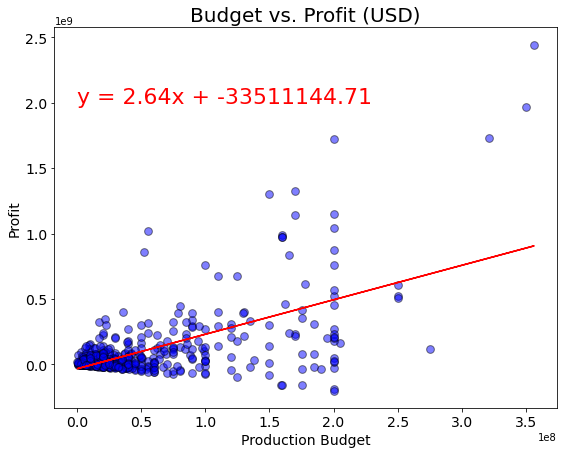

In [10]:
a = box_office["Budget"]
b = box_office["Profit"]
c = "Production Budget"
d = "Profit"
e = "Budget vs. Profit (USD)"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between Pre covid Budget and Profit?

The coefficient of determination is: 0.49189266384936065
The correlation is: 0.7


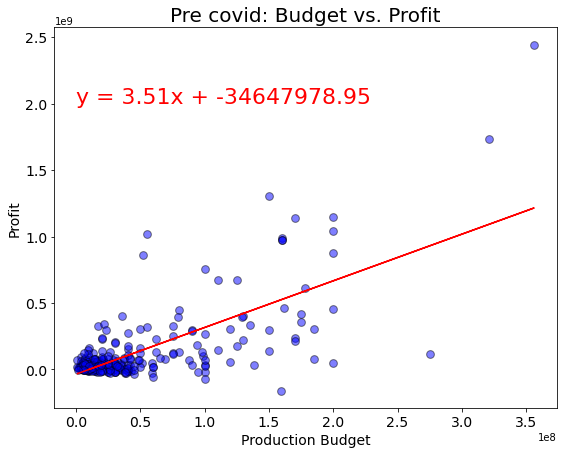

In [11]:
a = box_office_pre["Budget"]
b = box_office_pre["Profit"]
c = "Production Budget"
d = "Profit"
e = "Pre covid: Budget vs. Profit"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between Post covid Budget and Profit?

The coefficient of determination is: 0.2824425617108083
The correlation is: 0.53


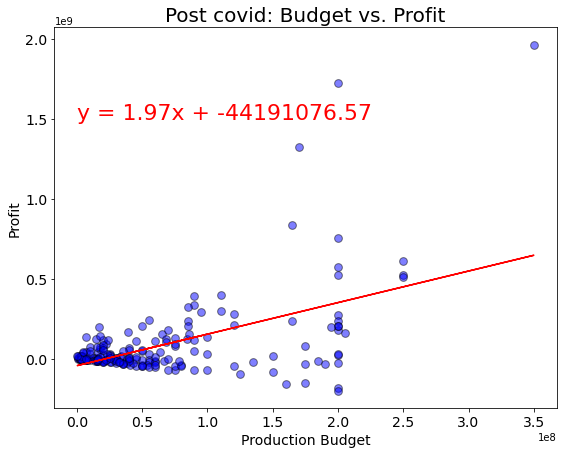

In [12]:
a = box_office_post["Budget"]
b = box_office_post["Profit"]
c = "Production Budget"
d = "Profit"
e = "Post covid: Budget vs. Profit"
f = 0
g = 1.5e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2018 Budget and Profit?

The coefficient of determination is: 0.5474469081024314
The correlation is: 0.74


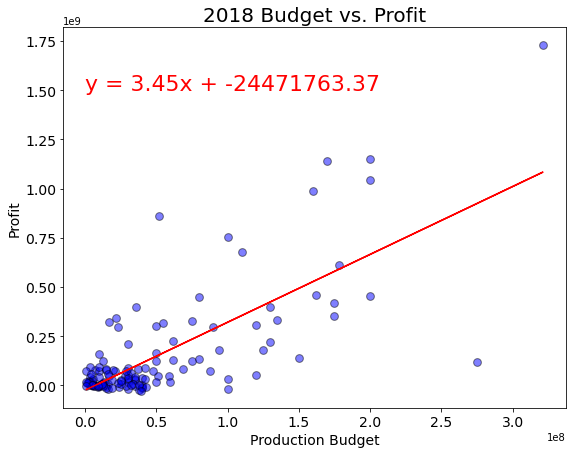

In [13]:
a = box_office_2018["Budget"]
b = box_office_2018["Profit"]
c = "Production Budget"
d = "Profit"
e = "2018 Budget vs. Profit"
f = 0
g = 1.5e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2019 Budget and Profit?

The coefficient of determination is: 0.44524851439252205
The correlation is: 0.67


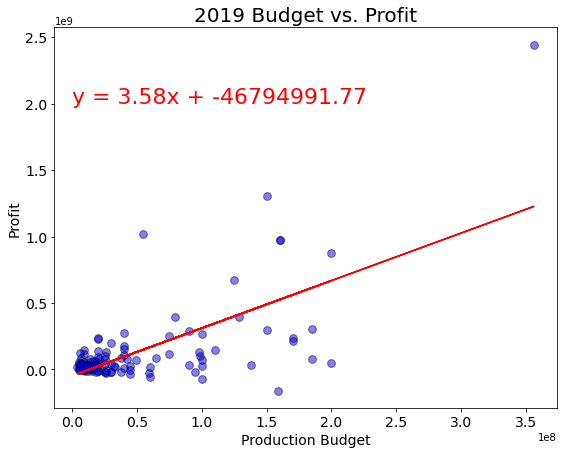

In [14]:
a = box_office_2019["Budget"]
b = box_office_2019["Profit"]
c = "Production Budget"
d = "Profit"
e = "2019 Budget vs. Profit"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2020 Budget and Profit?

The coefficient of determination is: 0.08953284623872267
The correlation is: 0.3


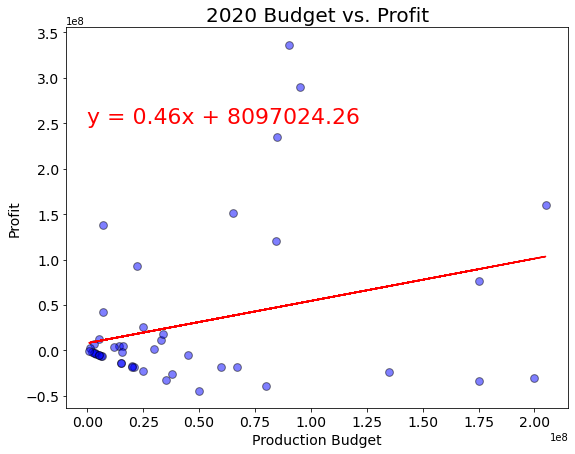

In [15]:
a = box_office_2020["Budget"]
b = box_office_2020["Profit"]
c = "Production Budget"
d = "Profit"
e = "2020 Budget vs. Profit"
f = 0
g = 2.5e8
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2021 Budget and Profit?

The coefficient of determination is: 0.1754529597737725
The correlation is: 0.42


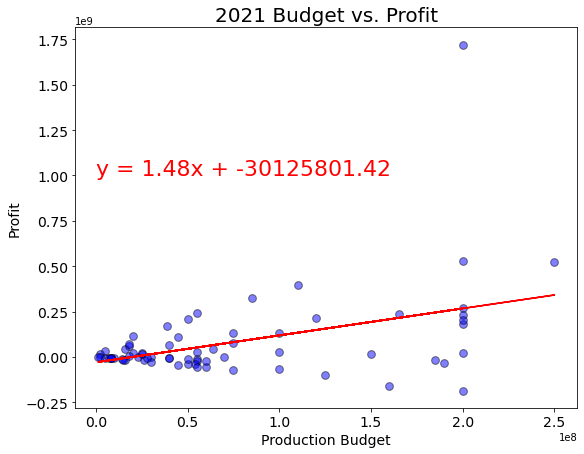

In [16]:
a = box_office_2021["Budget"]
b = box_office_2021["Profit"]
c = "Production Budget"
d = "Profit"
e = "2021 Budget vs. Profit"
f = 0
g = 1e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2022 Budget and Profit?

The coefficient of determination is: 0.4288272635173426
The correlation is: 0.65


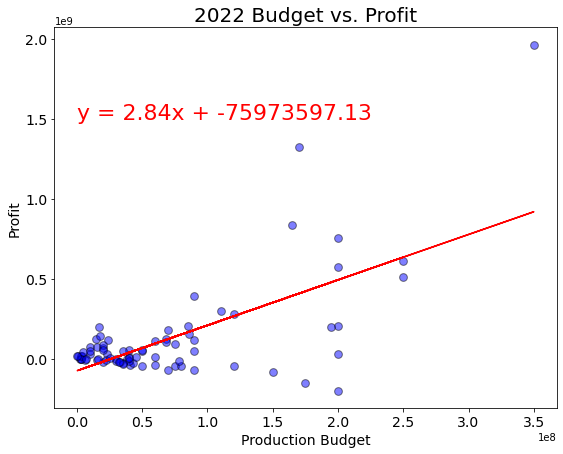

In [17]:
a = box_office_2022["Budget"]
b = box_office_2022["Profit"]
c = "Production Budget"
d = "Profit"
e = "2022 Budget vs. Profit"
f = 0
g = 1.5e9
sp(a,b,c,d,e,f,g)

In [18]:
#List of unique years
box_office["Year"] = box_office["Release"].dt.strftime("%Y")
years = box_office["Year"].unique()[::-1]

C:\Users\vinay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#Statistics DataFrame
stats_df = pd.DataFrame({"Categories":["All years","Pre COVID","Post COVID","2018","2019","2020","2021","2022"],
                   "Coefficients of Determination":list_of_cods,
                   "Correlation coefficients":list_of_corrs})
stats_df

,Categories,Coefficients of Determination,Correlation coefficients
0,All years,0.361214,0.60
1,Pre COVID,0.491893,0.70
2,Post COVID,0.282443,0.53
3,2018,0.547447,0.74
4,2019,0.445249,0.67
5,2020,0.089533,0.30
6,2021,0.175453,0.42
7,2022,0.428827,0.65


In [20]:
#Annual statistics DataFrame
annual_stats_df = stats_df.loc[stats_df["Categories"].isin(years)]
annual_stats_df

,Categories,Coefficients of Determination,Correlation coefficients
3,2018,0.547447,0.74
4,2019,0.445249,0.67
5,2020,0.089533,0.30
6,2021,0.175453,0.42
7,2022,0.428827,0.65


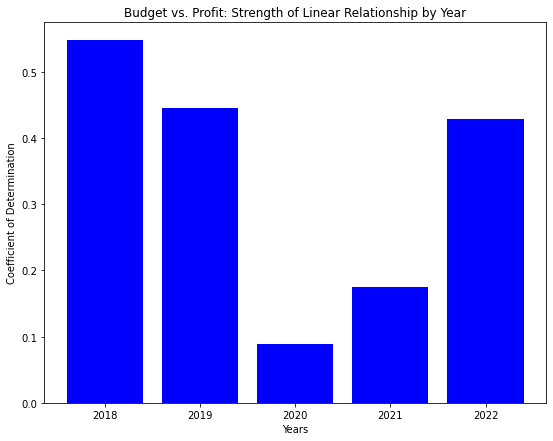

In [21]:
#Budget vs. Profit annual linear relationship bar chart
plt.figure(figsize=(9,7))
plt.bar(annual_stats_df["Categories"],annual_stats_df["Coefficients of Determination"],color="blue")
plt.xlabel("Years")
plt.ylabel("Coefficient of Determination")
plt.title("Budget vs. Profit: Strength of Linear Relationship by Year")
plt.show()

The Linear relationship between Budget and Profit weakens with COVID but is starting to strengthen. However, overall, the Linear relationship between Budget and Profit is not strong, historically speaking. Only 50% to 60% of the variablility in the data is explained by the Linear model pre-COVID.

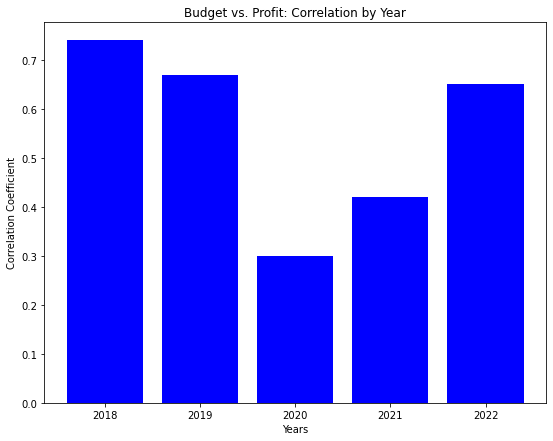

In [22]:
#Budget vs. Profit annual correlation bar chart
plt.figure(figsize=(9,7))
plt.bar(annual_stats_df["Categories"],annual_stats_df["Correlation coefficients"],color="blue")
plt.xlabel("Years")
plt.ylabel("Correlation Coefficient")
plt.title("Budget vs. Profit: Correlation by Year")
plt.show()

The correlation between Budget and Profit is strong pre-COVID, with values close to 1. When COVID begins, the correlation drops significantly, but it is starting to recover.

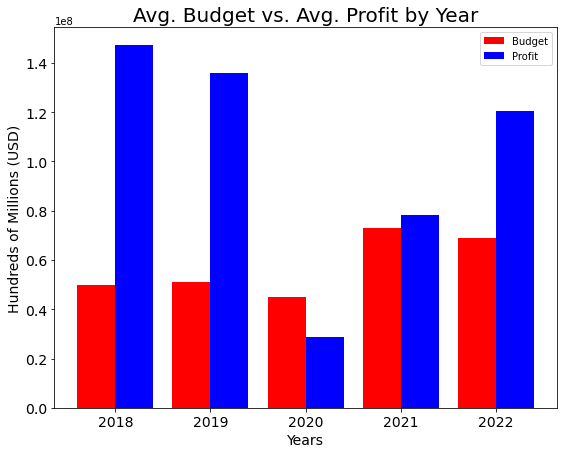

In [23]:
average = box_office.groupby("Year").mean()
x = average["Budget"].index
y1 = average["Budget"]
y2 = average["Profit"]
x_axis = np.arange(len(x))
plt.figure(figsize=(9,7))
plt.bar(x_axis-0.2,y1,0.4,label="Budget",color="r")
plt.bar(x_axis+0.2,y2,0.4,label="Profit",color="b")
plt.tick_params(axis="both",which="major",labelsize=14)
plt.xticks(x_axis,x)
plt.xlabel("Years",size=14)
plt.ylabel("Hundreds of Millions (USD)",size=14)
plt.legend()
plt.title("Avg. Budget vs. Avg. Profit by Year",size=20)
plt.show()

### What is the Distribution of Budgets by Year?

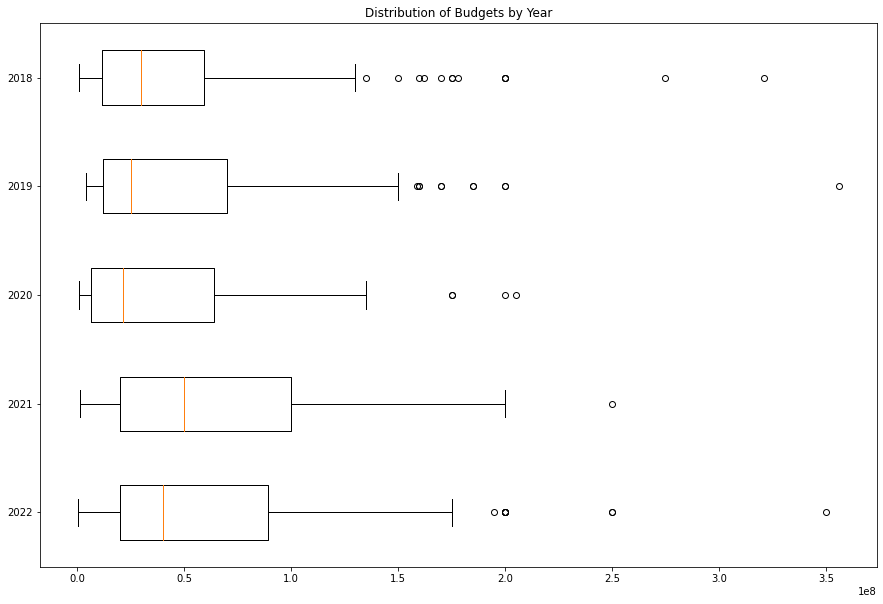

array(['2022', '2021', '2020', '2019', '2018'], dtype=object)

In [24]:
years = box_office["Year"].unique()[::-1]

for_boxplots = [box_office.loc[box_office["Year"]==year,"Budget"] for year in years]

plt.figure(figsize=(15,10))
plt.boxplot(for_boxplots, labels=years,vert=False)
plt.title("Distribution of Budgets by Year")

plt.show()
years

### What is the Distribution of Gross by Year?

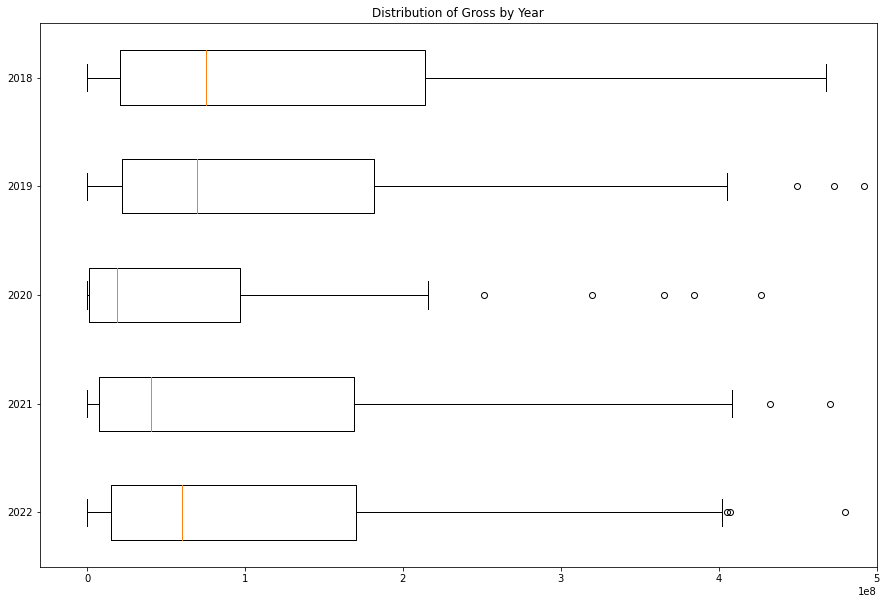

In [25]:
for_boxplots = [box_office.loc[box_office["Year"]==year,"Gross"] for year in years]

plt.figure(figsize=(15,10))
plt.boxplot(for_boxplots,labels=years,vert=False)
plt.title("Distribution of Gross by Year")
plt.xlim([-0.03e9,0.5e9])

plt.show()

### What is the Distribution of ROI by Year?

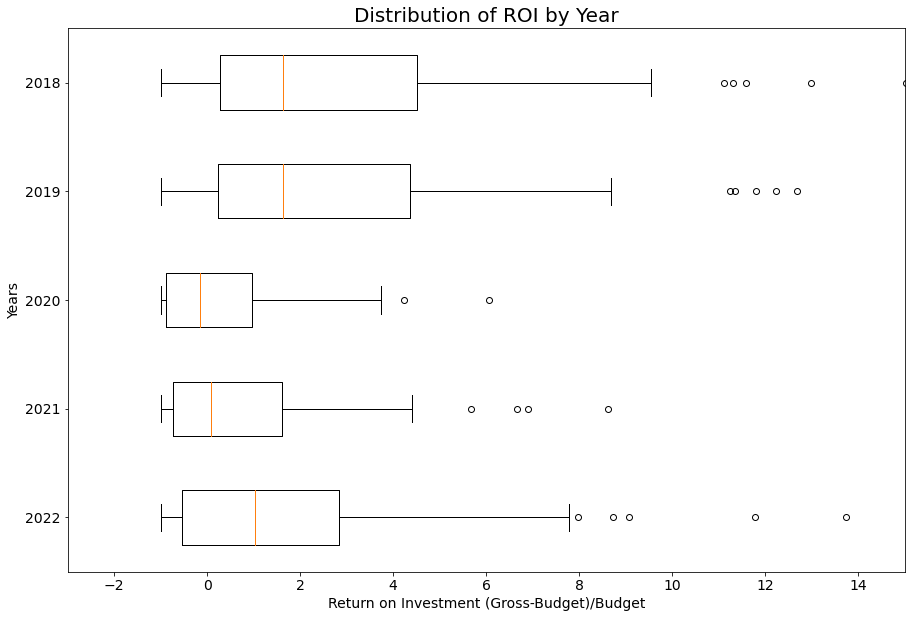

In [26]:
for_boxplots = [box_office.loc[box_office["Year"]==year,"ROI"] for year in years]

plt.figure(figsize=(15,10))
plt.boxplot(for_boxplots,labels=years,vert=False)
plt.title("Distribution of ROI by Year",size=20)
plt.tick_params(axis="both",which="major",labelsize=14)
plt.xlabel("Return on Investment (Gross-Budget)/Budget",size=14)
plt.ylabel("Years",size=14)
plt.xlim([-3,15])

plt.show()

### What is the Distribution of Profit by Year?

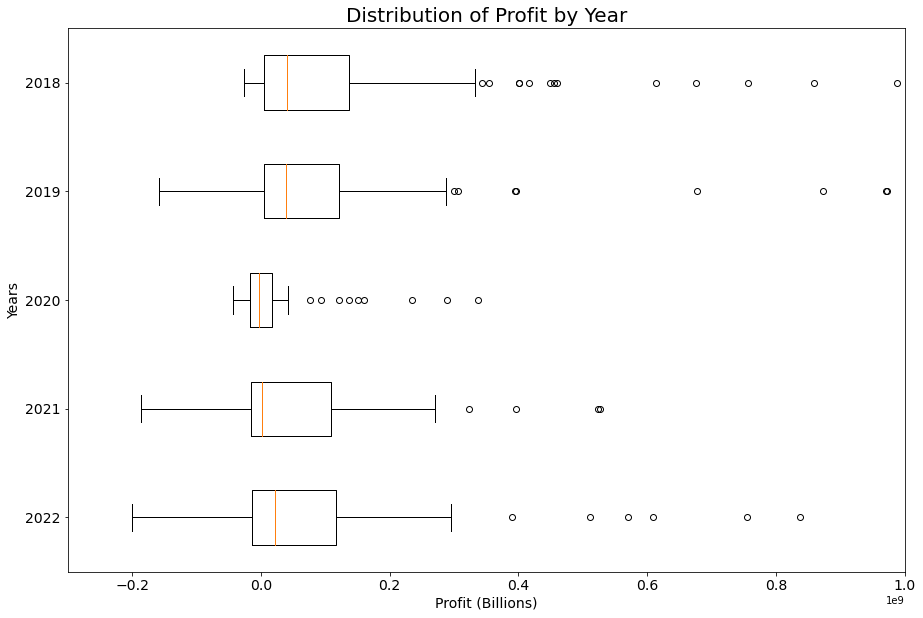

In [27]:
for_boxplots = [box_office.loc[box_office["Year"]==year,"Profit"] for year in years]

plt.figure(figsize=(15,10))
plt.boxplot(for_boxplots,labels=years,vert=False)
plt.title("Distribution of Profit by Year",size=20)
plt.tick_params(axis="both",which="major",labelsize=14)
plt.xlabel("Profit (Billions)",size=14)
plt.ylabel("Years",size=14)
plt.xlim([-0.3e9,1e9])

plt.show()

### What were the major Outliers for ROI?

In [28]:
box_office.loc[box_office["ROI"]>30]

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform,CurrencyBudget,CurrencyGross,Language,ROI,Profit,Year
143,Searching,Movie,2018-08-31,6120.0,Drama,NaN,71.0,7.6,170139,tt7668870,880000.0,75462037.0,others,USD,USD,English,84.752315,74582037.0,2018
1079,Terrifier 2,Movie,2022-10-06,8280.0,Horror,NaN,59.0,6.2,32431,tt10403420,250000.0,15065239.0,others,USD,USD,English,59.260956,14815239.0,2022


### Null Hypothesis 2: Budget has no effect on imdbRating for Netflix movies

In [29]:
#Netflix definition
netflix = clean_df.loc[(clean_df["imdbRating"].notnull())&
                       (clean_df["Platform"]=="netflix")&
                       (clean_df["CurrencyBudget"]=="USD")]
len(netflix)

35

### What is the strength of the relationship between Budget and imdbRating for Netflix movies

The coefficient of determination is: 0.04257349421496146
The correlation is: 0.21


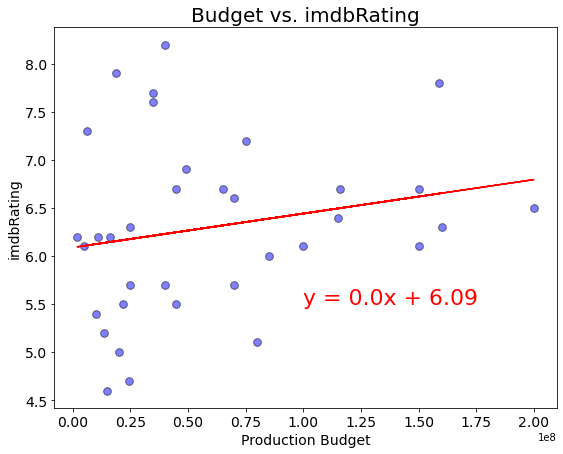

In [30]:
a = netflix["Budget"]
b = netflix["imdbRating"]
c = "Production Budget"
d = "imdbRating"
e = "Budget vs. imdbRating"
f = 1e8
g = 5.5
sp(a,b,c,d,e,f,g)

In [31]:
#Number of movies by Platform
clean_df["Platform"].value_counts()

others     929
netflix    151
amazon      32
hulu        24
disney      17
Name: Platform, dtype: int64

### What is the average Net Profit per genre before COVID?

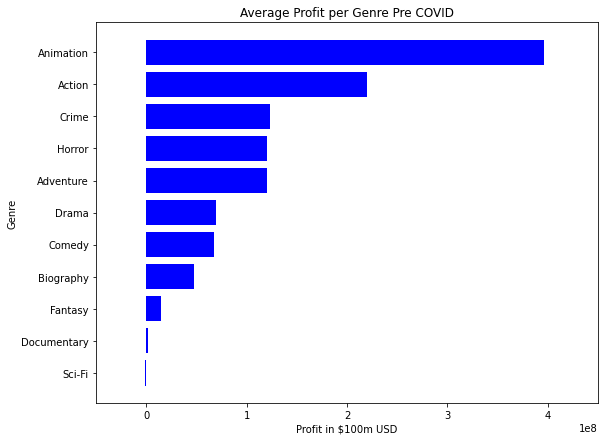

In [32]:
genre_profit = box_office_pre.groupby("Genre")["Profit"].mean()
genre_profit.sort_values(ascending=True,inplace=True)
plt.figure(figsize=(9,7))
plt.barh(genre_profit.index,genre_profit,color="blue")
plt.xlabel("Profit in $100m USD")
plt.ylabel("Genre")
plt.title("Average Profit per Genre Pre COVID")
plt.xlim(-0.5e8,4.5e8)
plt.show()

### What is the average Net Profit per genre after COVID?

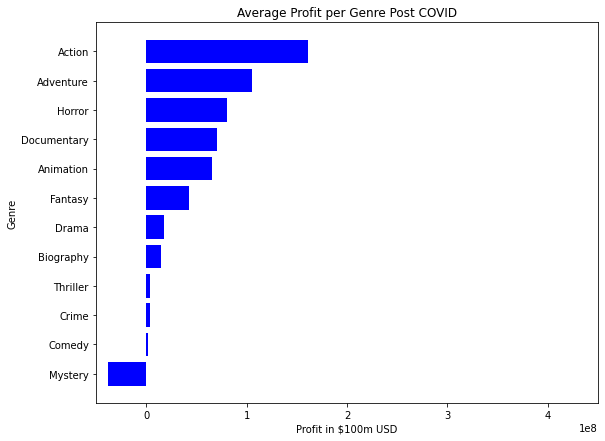

In [33]:
genre_profit = box_office_post.groupby("Genre")["Profit"].mean()
genre_profit.sort_values(ascending=True,inplace=True)
plt.figure(figsize=(9,7))
plt.barh(genre_profit.index,genre_profit,color="blue")
plt.xlabel("Profit in $100m USD")
plt.ylabel("Genre")
plt.title("Average Profit per Genre Post COVID")
plt.xlim(-0.5e8,4.5e8)
plt.show()

### What is the average Return on Investment per genre Pre COVID?

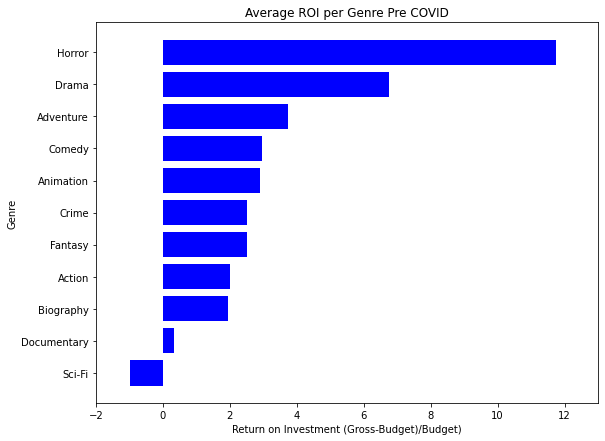

In [34]:
genre_roi = box_office_pre.groupby("Genre")["ROI"].mean()
genre_roi.sort_values(ascending=True,inplace=True)
plt.figure(figsize=(9,7))
plt.barh(genre_roi.index,genre_roi,color="blue")
plt.xlabel("Return on Investment (Gross-Budget)/Budget)")
plt.ylabel("Genre")
plt.title("Average ROI per Genre Pre COVID")
plt.xlim(-2,13)
plt.show()

### What is the average Return on Investment per genre Post COVID?

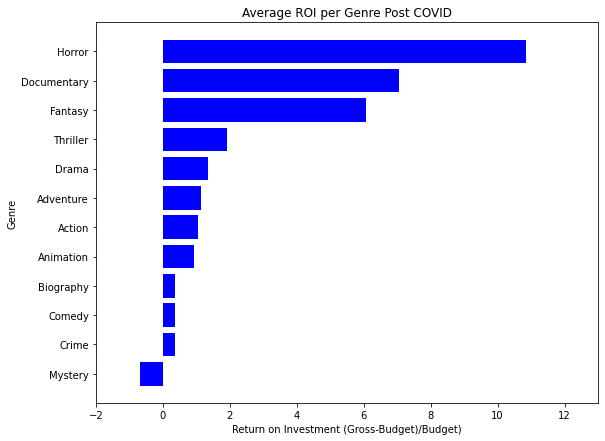

In [35]:
genre_roi = box_office_post.groupby("Genre")["ROI"].mean()
genre_roi.sort_values(ascending=True,inplace=True)
plt.figure(figsize=(9,7))
plt.barh(genre_roi.index,genre_roi,color="blue")
plt.xlabel("Return on Investment (Gross-Budget)/Budget)")
plt.ylabel("Genre")
plt.title("Average ROI per Genre Post COVID")
plt.xlim(-2,13)
plt.show()

In [36]:
netflix = clean_df.loc[(clean_df["Platform"]=="netflix")&
                       (clean_df["Budget"].notnull())]
not_netflix = clean_df.loc[(clean_df["Platform"]=="others")&
                           (clean_df["Budget"].notnull())]
print(netflix["Budget"].mean(),len(netflix))
print(not_netflix["Budget"].mean(),len(not_netflix))

59931428.571428575 35
54198182.22246696 454
